In [1]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data1 = "Team_Project_1/Team_Project_Cook1.csv"
data2 = "Team_Project_1/TeamProject_zc_606.csv"

lowaccess_income_df = pd.read_csv(data1)
zipcodes_for_606_df = pd.read_csv(data2)

In [3]:
# Merge the first two datasets on "Wrestler" so that no data is lost (should be 182 rows)
combined_tracts_df = pd.merge(lowaccess_income_df, zipcodes_for_606_df,
                                 how='outer', left_on='CensusTract', right_on='tract')
combined_tracts_df.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,NUMGQTRS,PCTGQTRS,LowIncomeTracts,PovertyRate,...,TractOMultir,TractHispanic,TractHUNV,TractSNAP,tract,zip,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,1.703125e+10,Illinois,Cook,1.0,4302.0,1498.0,17.0,0.003952,1.0,33.5,...,153.0,215.0,545.0,650.0,1.703125e+10,60651.0,0.105243,0.092531,0.089947,0.103168
1,1.703125e+10,Illinois,Cook,1.0,3649.0,1109.0,20.0,0.005481,1.0,36.4,...,83.0,135.0,274.0,484.0,1.703125e+10,60651.0,0.001237,0.014541,0.002352,0.002247
2,1.703125e+10,Illinois,Cook,1.0,3649.0,1109.0,20.0,0.005481,1.0,36.4,...,83.0,135.0,274.0,484.0,1.703125e+10,60644.0,0.061452,0.018727,0.025177,0.054930
3,1.703143e+10,Illinois,Cook,1.0,2963.0,1814.0,10.0,0.003375,1.0,24.9,...,68.0,50.0,988.0,594.0,1.703143e+10,60649.0,0.072917,0.028223,0.062432,0.070103
4,1.703143e+10,Illinois,Cook,1.0,2210.0,1090.0,263.0,0.119005,1.0,38.1,...,70.0,71.0,433.0,315.0,1.703143e+10,60649.0,0.045946,0.041953,0.051254,0.046359


In [4]:
combined_tracts_df.to_csv('DataMerge1.csv')

In [5]:
data3 ="Team_Project_1/DataMerge2.csv"
cleanmerge_df =pd.read_csv(data3)

In [6]:
plt.style.use("ggplot")
fig,ax=plt.subplots()
plt1=ax.scatter(cleanmerge_df["zip"],
                cleanmerge_df["POP2010"],
s=cleanmerge_df["TractKids"]/(1e2)*40,
c=cleanmerge_df["TractKids"],
cmap=plt.cm.Blues,
vmin=0,
vmax=cleanmerge_df["TractKids"].max(),
edgecolor="#6b0c08",
linewidth=.65)
cbar=fig.colorbar(plt1)
cbar.set_label("Kids")
ax.set_xlabel("Zip Codes in Chicago")
ax.set_ylabel("Popualtion")
ax.set_title("Children (<17yrs) within Food Desert")
#plt.xlim(1300,7500)
#plt.ylim(0,55)


Text(0.5,1,'Children (<17yrs) within Food Desert')

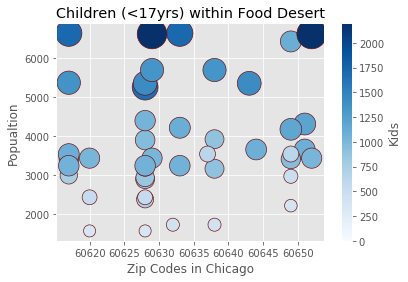

In [7]:
plt.savefig("NewData3.jpg")
plt.show()

In [21]:
plt.style.use("ggplot")
fig,ax=plt.subplots()
plt1=ax.scatter(cleanmerge_df["zip"],
                cleanmerge_df["POP2010"],
s=cleanmerge_df["TractSeniors"]/(1e2)*40,
c=cleanmerge_df["TractSeniors"],
cmap=plt.cm.PRGn,
vmin=0,
vmax=cleanmerge_df["TractSeniors"].max(),
edgecolor="#6b0c08",
linewidth=.65)
cbar=fig.colorbar(plt1)
cbar.set_label("Seniors ")
ax.set_xlabel("Zip Codes in Chicago")
ax.set_ylabel("Popualtion")
ax.set_title("Seniors (65+yrs) within Food Desert")

Text(0.5,1,'Seniors (65+yrs) within Food Desert')

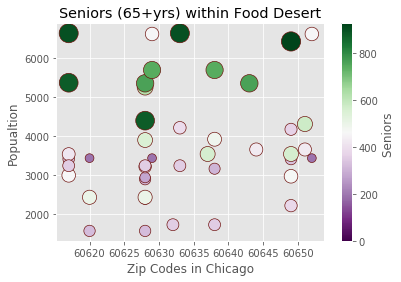

In [22]:
plt.savefig("NewSeniors.jpg")
plt.show()

In [8]:
plt.style.use("ggplot")
fig,ax=plt.subplots()
plt1=ax.scatter(cleanmerge_df["zip"],
                cleanmerge_df["TractHUNV"],
s=cleanmerge_df["TractSNAP"]/(1e2)*40,
c=cleanmerge_df["TractSNAP"],
cmap=plt.cm.Greens,
vmin=0,
vmax=cleanmerge_df["TractSNAP"].max(),
edgecolor="#6b0c08",
linewidth=.65)
cbar=fig.colorbar(plt1)
cbar.set_label("SNAP Users")
ax.set_xlabel("Zip Codes in Chicago")
ax.set_ylabel("Housing Units w/o Vehicle")
ax.set_title("Lack of Vehicles within Food Desert")

Text(0.5,1,'Lack of Vehicles within Food Desert')

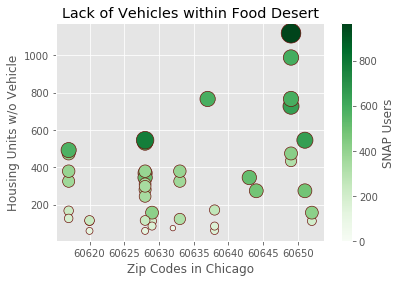

In [9]:
plt.savefig("NewData4.jpg")
plt.show()

In [10]:
plt.style.use("ggplot")
fig,ax=plt.subplots()
plt1=ax.scatter(cleanmerge_df["zip"],
                cleanmerge_df["TractHUNV"],
s=cleanmerge_df["TractHUNV"]/(1e2)*40,
c=cleanmerge_df["TractHUNV"],
edgecolor="#6b0c08",
cmap=plt.cm.Greens,
vmin=0,
vmax=cleanmerge_df["TractSNAP"].max(),
linewidth=.8)
ax.set_xlabel("Zip Codes in Chicago")
ax.set_ylabel("Housing Units w/o Vehicle")
ax.set_title("Lack of Vehicles within Food Desert")

Text(0.5,1,'Lack of Vehicles within Food Desert')

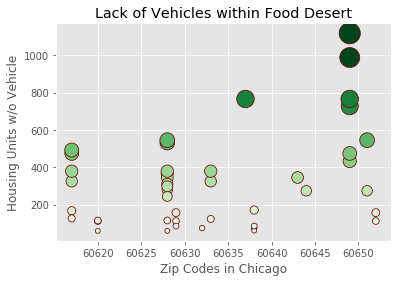

In [11]:
plt.savefig("NewData5.jpg")
plt.show()

In [12]:
# Set x axis and tick locations
x_axis = np.arange(len(cleanmerge_df))
tick_locations = [value+0.4 for value in x_axis]

In [27]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, cleanmerge_df["TractBlack"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, cleanmerge_df["zip"], rotation="vertical")
plt.xlabel(" Zip Codes within Food Deserts")
plt.ylabel(" # of Individuals")
plt.title("Blacks Within Food Deserts")

Text(0.5,1,'Blacks Within Food Deserts')

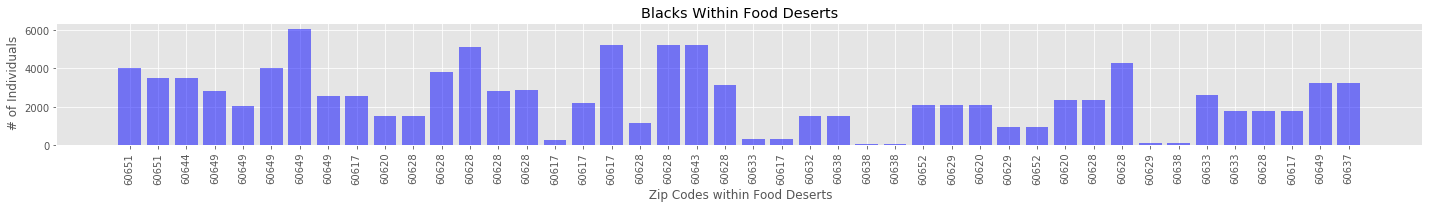

In [28]:
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("DataBlack7")
plt.show()

In [16]:
# Set x axis and tick locations
x_axis = np.arange(len(cleanmerge_df))
tick_locations = [value+0.4 for value in x_axis]

In [19]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, cleanmerge_df["LALOWI1_10"], color='m', alpha=0.5, align="edge")
plt.xticks(tick_locations, cleanmerge_df["zip"], rotation="vertical")
plt.xlabel(" Zip Codes within Food Deserts")
plt.ylabel(" # of Individuals")
plt.title("Low Access/Income 1 Miles From A Supermarket")

Text(0.5,1,'Low Access/Income 1 Miles From A Supermarket')

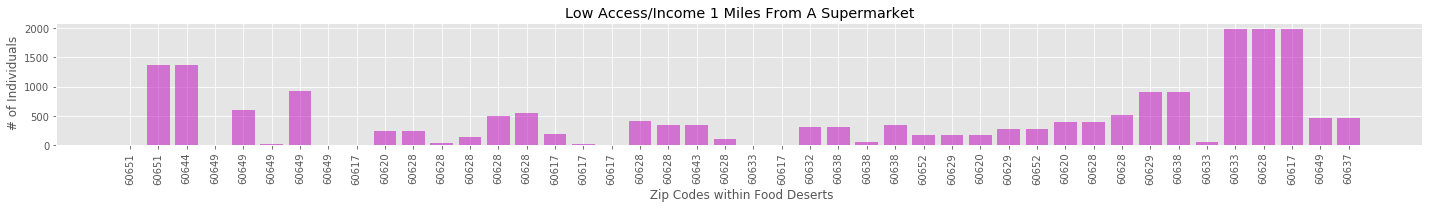

In [20]:
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("NewData8")
plt.show()

In [29]:
# Set x axis and tick locations
x_axis = np.arange(len(cleanmerge_df))
tick_locations = [value+0.4 for value in x_axis]

In [37]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, cleanmerge_df["TractHispanic"], color='Red', alpha=0.9, align="edge")
plt.xticks(tick_locations, cleanmerge_df["zip"], rotation="vertical")
plt.xlabel(" Zip Codes within Food Deserts")
plt.ylabel(" # of Individuals")
plt.title("Hispanic Within Food Deserts")

Text(0.5,1,'Hispanic Within Food Deserts')

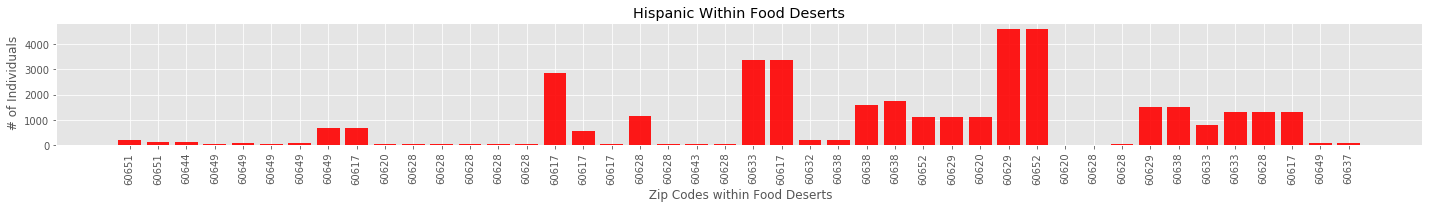

In [38]:
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("DataHispanic8")
plt.show()

In [39]:
# Set x axis and tick locations
x_axis = np.arange(len(cleanmerge_df))
tick_locations = [value+0.4 for value in x_axis]

In [40]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, cleanmerge_df["TractWhite"], color='Black', alpha=0.9, align="edge")
plt.xticks(tick_locations, cleanmerge_df["zip"], rotation="vertical")
plt.xlabel(" Zip Codes within Food Deserts")
plt.ylabel(" # of Individuals")
plt.title("Whites Within Food Deserts")

Text(0.5,1,'Whites Within Food Deserts')

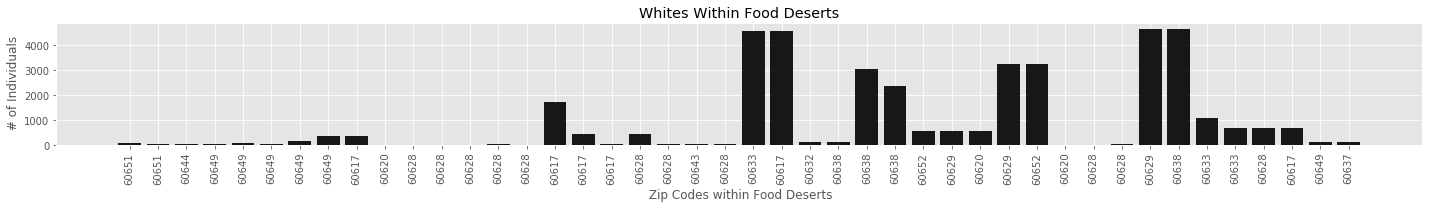

In [41]:
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("DataWhites9")
plt.show()

In [42]:
# Set x axis and tick locations
x_axis = np.arange(len(cleanmerge_df))
tick_locations = [value+0.4 for value in x_axis]

In [44]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, cleanmerge_df["TractOMultir"], color='Green', alpha=0.9, align="edge")
plt.xticks(tick_locations, cleanmerge_df["zip"], rotation="vertical")
plt.xlabel(" Zip Codes within Food Deserts")
plt.ylabel(" # of Individuals")
plt.title("Multi-Racials Within Food Deserts")

Text(0.5,1,'Multi-Racials Within Food Deserts')

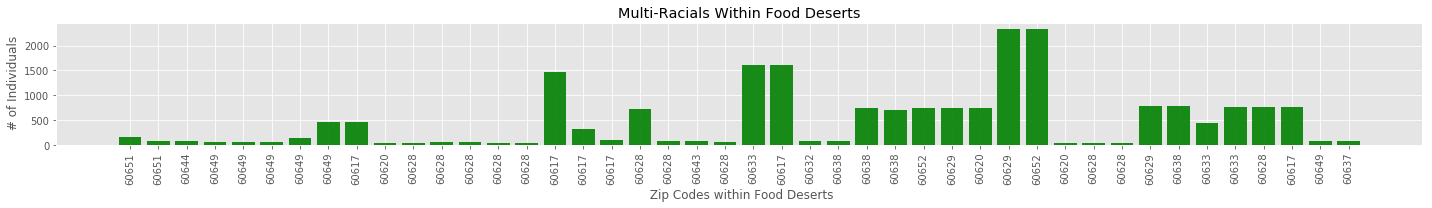

In [45]:
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("DataMulti10")
plt.show()

In [48]:
plt.style.use("ggplot")
fig,ax=plt.subplots()
plt1=ax.scatter(cleanmerge_df["zip"],
                cleanmerge_df["MedianFamilyIncome"],
s=cleanmerge_df["TractSNAP"]/(1e2)*40,
c=cleanmerge_df["TractSNAP"],
cmap=plt.cm.RdGy,
vmin=0,
vmax=cleanmerge_df["TractSNAP"].max(),
edgecolor="#6b0c08",
linewidth=.65)
cbar=fig.colorbar(plt1)
cbar.set_label("SNAP Recipients")
ax.set_xlabel("Zip Codes in Chicago")
ax.set_ylabel("Avg Income")
ax.set_title("Median Family Income within Food Desert")

Text(0.5,1,'Median Family Income within Food Desert')

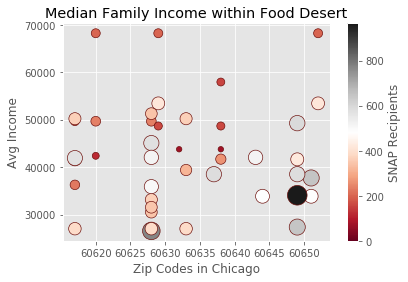

In [49]:
plt.savefig("DataIncome11.jpg")
plt.show()

In [14]:
# Set x and y limits
#plt.xlim(-0.25, len(x_axis))
#plt.ylim(0, max(rain_df["Inches"])+10)

In [50]:
cleanmerge_df.describe()

,Unnamed: 0,CensusTract,Urban,POP2010,OHU2010,NUMGQTRS,PCTGQTRS,LowIncomeTracts,PovertyRate,MedianFamilyIncome,...,TractOMultir,TractHispanic,TractHUNV,TractSNAP,tract,zip,res_ratio,bus_ratio,oth_ratio,tot_ratio
count,44.000000,4.400000e+01,44.0,44.000000,44.000000,44.000000,44.000000,44.0,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000
mean,29.386364,1.703159e+10,1.0,3846.227273,1380.181818,34.750000,0.009107,1.0,27.090909,42501.681818,...,478.000000,868.977273,326.159091,380.227273,1.703159e+10,60633.272727,0.059071,0.058450,0.063014,0.058983
std,27.576714,1.654731e+05,0.0,1435.129017,574.985066,95.250496,0.023644,0.0,10.373038,10880.680348,...,594.383832,1206.330868,252.014022,193.942675,1.654731e+05,11.418801,0.087216,0.082088,0.103443,0.086121
min,0.000000,1.703125e+10,1.0,1562.000000,506.000000,0.000000,0.000000,1.0,8.900000,26542.000000,...,34.000000,21.000000,59.000000,75.000000,1.703125e+10,60617.000000,0.000000,0.000000,0.000000,0.000028
25%,10.750000,1.703149e+10,1.0,2980.250000,1017.750000,0.000000,0.000000,1.0,19.975000,34001.000000,...,68.000000,56.500000,115.000000,221.500000,1.703149e+10,60628.000000,0.011169,0.014479,0.002523,0.011981
50%,22.000000,1.703154e+10,1.0,3478.500000,1203.000000,3.000000,0.000822,1.0,26.050000,41970.000000,...,119.500000,214.000000,289.000000,367.000000,1.703154e+10,60629.000000,0.036214,0.028567,0.025422,0.034699
75%,33.250000,1.703171e+10,1.0,4602.750000,1757.750000,17.750000,0.004334,1.0,36.325000,49632.500000,...,750.000000,1331.000000,443.250000,507.500000,1.703171e+10,60643.250000,0.063717,0.057132,0.068472,0.061406
max,96.000000,1.703184e+10,1.0,6628.000000,3280.000000,507.000000,0.119005,1.0,50.200000,68194.000000,...,2331.000000,4599.000000,1118.000000,965.000000,1.703184e+10,60652.000000,0.489631,0.366242,0.502203,0.479040
